In [1]:
# Basic NN for TSURF-HW
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import rcParams #For changing text properties
import cmocean #A package with beautiful colormaps
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Analysis when winter sat is the target

In [2]:
# Read 2mT field
tas_data = xr.open_dataset('/work/uo1075/u301680/all_member/detrend/all_detrend_land.nc') # detrend
#tas_data = xr.open_dataset('/work/uo1075/u301680/all_member/land/all.nc') # trend
#tas_data = xr.open_dataset('/work/uo1075/u301680/all_member/land/europe_2_land.nc') # trend member 10
#tas_data = xr.open_dataset('/work/uo1075/u301680/all_member/land/europe_10_land_detrend.nc') # trend member 10

#tas_data = xr.open_dataset('/work/uo1075/u301680/all_member/test/all_europe_mask_detrend.nc') # detrend

In [3]:
# # Assuming 'ds' is your xarray dataset with a 'time' dimension
# linear_fit = tas_data['tas'].polyfit(dim='time', deg=1)

In [4]:
# Extract Europe 2mT
#tas_europe = tas_data.sel(lat=slice(33, 79), lon=slice(0, 50))
tas_europe = tas_data.sel(lat=slice(35, 70), lon=slice(-11, 40))

# Calculate seasonal (quarterly) means with seasons starting in December (DJF)
tas_seasonal = tas_europe['tas'].resample(time="QS-DEC").mean()

# Select winter seasons (December as the starting month of winter)
tas_winter = tas_seasonal.sel(time=tas_seasonal.time.dt.month==12)
#tas_winter = tas_seasonal.sel(time=(tas_seasonal.time.dt.month.isin([12, 1, 2])))

# Select data from 1850 to 2013
tas_winter = tas_winter.sel(time=slice("1850-12-01T00:00:00.000000000", "2013-12-01T00:00:00.000000000"))

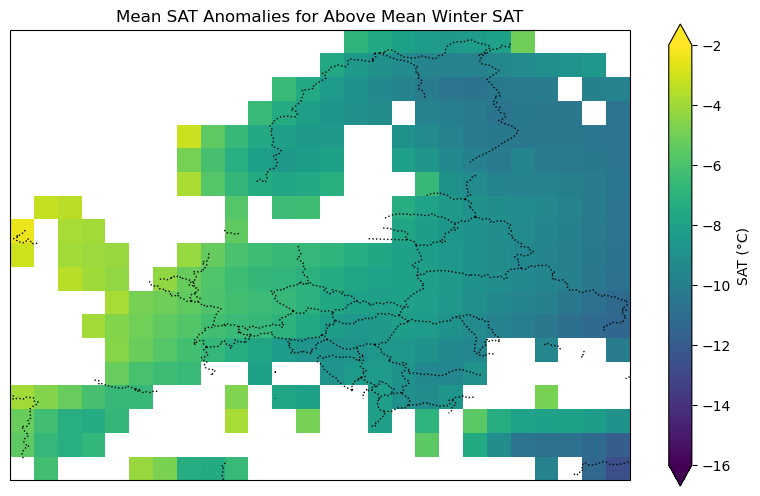

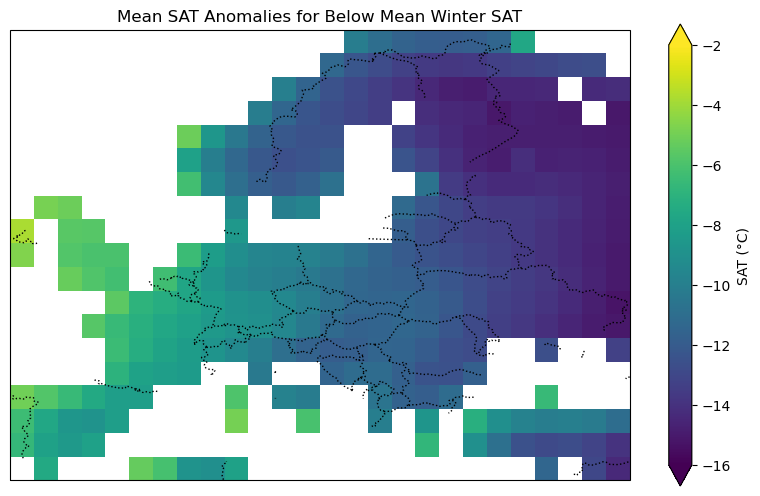

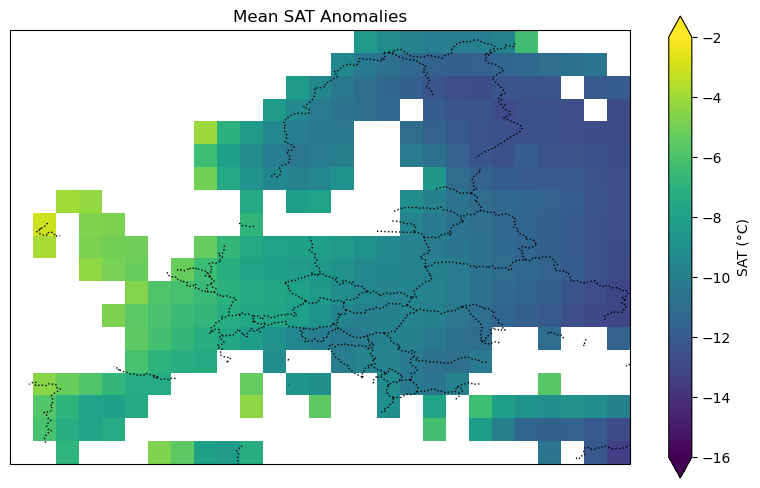

In [5]:
# Store the autumn data into hw_exceed variable
hw_exceed = tas_winter

# # Calculate the mean SAT over both the member and time dimensions (members + years)
mean_tas_winter = hw_exceed.mean(dim=['record', 'time'], skipna=True)

# Step 1: Calculate the overall mean of hw_exceed
mean_sat = hw_exceed.mean(dim=['record','time'], skipna=True)

# Step 2: Create masks for above and below the mean
above_mean_mask = hw_exceed > mean_sat
below_mean_mask = hw_exceed < mean_sat

# Step 3: Subset data based on masks
above_mean_sat = hw_exceed.where(above_mean_mask, drop=True)
below_mean_sat = hw_exceed.where(below_mean_mask, drop=True)

# Step 4: Calculate the mean for each subset
mean_above_mean_sat = above_mean_sat.mean(dim=['record', 'time'], skipna=True)
mean_below_mean_sat = below_mean_sat.mean(dim=['record', 'time'], skipna=True)


#Step 5: Plotting
def plot_sst(data, title):
    plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    
    # Explicitly setting vmin and vmax in the xarray plot call
    data.plot(ax=ax, transform=ccrs.PlateCarree(), 
              cmap=plt.cm.get_cmap('viridis'), vmin=-16, vmax=-2,cbar_kwargs={'label': 'SAT (°C)', 'extend': 'both'})
    
    # Add coastlines and gridlines
    #ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_title(title)
    plt.show()


#Plot mean SST for above mean
plot_sst(mean_above_mean_sat, 'Mean SAT Anomalies for Above Mean Winter SAT')

# Plot mean SST for below mean
plot_sst(mean_below_mean_sat, 'Mean SAT Anomalies for Below Mean Winter SAT')

# Plot mean SST Anomalies
plot_sst(mean_tas_winter, 'Mean SAT Anomalies')


In [6]:
def plot_histogram(data, title, bins=30):
    plt.figure(figsize=(8, 6))
    plt.hist(data.values.flatten(), bins=bins, color='blue', edgecolor='black', alpha=0.7)
    plt.title(title)
    plt.xlabel('SST (°C)')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

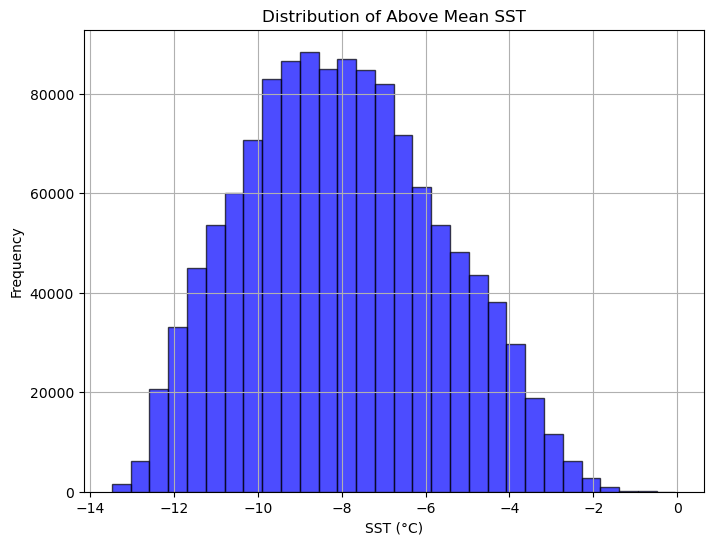

In [7]:
# Plot histogram for the above mean SST
plot_histogram(above_mean_sat, 'Distribution of Above Mean SST')

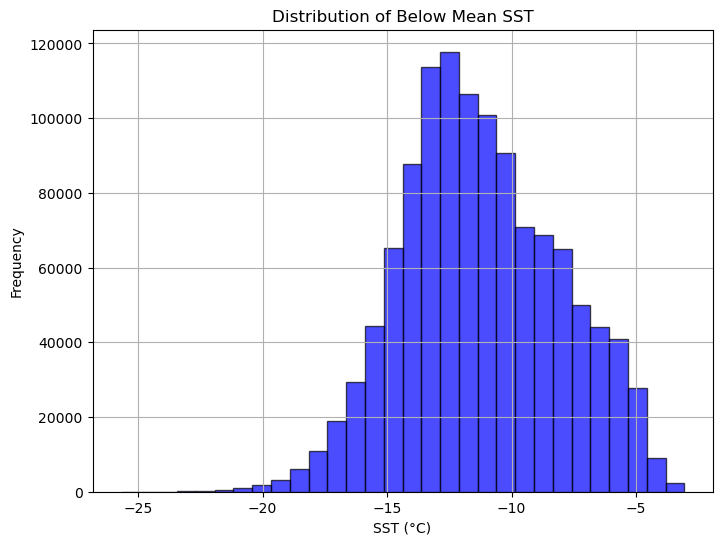

In [8]:
# Plot histogram for the below mean SST
plot_histogram(below_mean_sat, 'Distribution of Below Mean SST')